In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

from matplotlib_venn import venn3
import matplotlib.patches as mpatches

import networkx as nx
import pandas as pd

from urllib.request import urlopen
# from io import BytesIO
# from zipfile import ZipFile

import random
from collections import Counter


In [214]:
# Como lo corro localmente no me importa esto. Pero si lo corren en colab, descomentenlo.

# url = "http://materias.df.uba.ar/scytda2020c1/files/2020/04/TC01_data.zip"
# with urlopen(url) as zipresp:
#     with ZipFile(BytesIO(zipresp.read())) as zfile:
#        archivos = zfile.namelist()
#        for archivo in archivos:
#            if archivo.endswith('.txt') or archivo.endswith('.gml') or archivo.endswith('.csv'):
#                zfile.extract(archivo, '/content')

In [6]:
def abrir_txt(nombre_archivo):
    archivo=open(nombre_archivo)
    data=[]
    for linea in archivo:
        linea=linea.strip()
        columna=linea.split()
        data.append(columna)
    return data

# Ejercicio 1

## Item a: Presentar comparacion grafica de las 3 redes

In [39]:
# Archivos de redes
file_LIT = 'TC01_data/yeast_LIT.txt'
file_Y2H = 'TC01_data/yeast_Y2H.txt'
file_APMS = 'TC01_data/yeast_AP-MS.txt'

# Obtener listas de enlaces
lista_de_enlaces_LIT = abrir_txt(file_LIT)
lista_de_enlaces_Y2H = abrir_txt(file_Y2H)
lista_de_enlaces_APMS = abrir_txt(file_APMS)

# Crear grafos de NetworkX
Red_LIT = nx.Graph()
Red_LIT.add_edges_from(lista_de_enlaces_LIT)

Red_Y2H = nx.Graph()
Red_Y2H.add_edges_from(lista_de_enlaces_Y2H)

Red_APMS = nx.Graph()
Red_APMS.add_edges_from(lista_de_enlaces_APMS)

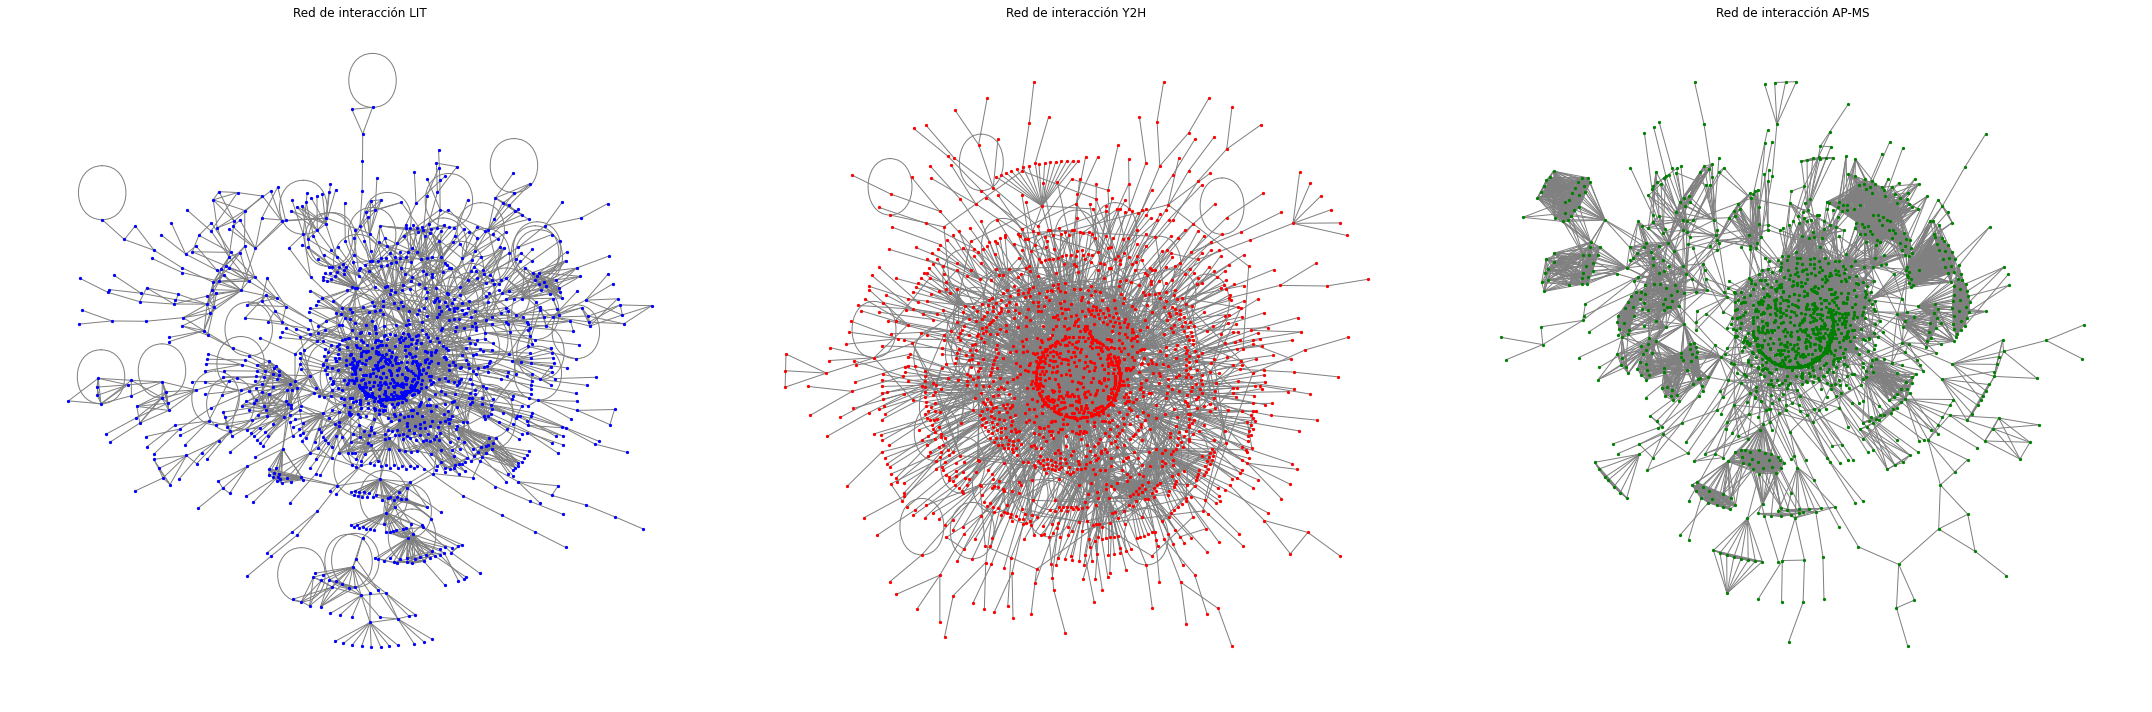

In [44]:
# Visualizar las redes
plt.figure(figsize=(30, 10))

plt.subplot(131)
plt.title('Red de interacción LIT')
nx.draw_kamada_kawai(Red_LIT, node_size=5, node_color='blue', edge_color='gray', with_labels=False)

plt.subplot(132)
plt.title('Red de interacción Y2H')
nx.draw_kamada_kawai(Red_Y2H, node_size=5, node_color='red', edge_color='gray', with_labels=False)

plt.subplot(133)
plt.title('Red de interacción AP-MS')
nx.draw_kamada_kawai(Red_APMS, node_size=5, node_color='green', edge_color='gray', with_labels=False)

plt.tight_layout()
plt.show()

## Item B: Resumen en Tabla de Características de las Redes

In [48]:
# Definir las redes y sus nombres
redes = [Red_LIT, Red_Y2H, Red_APMS]
nombres_redes = ['LIT', 'Y2H', 'AP-MS']

# Definir funciones para calcular estadísticas de las redes
def calcular_grado_medio(red):
    return sum(val for node, val in red.degree()) / len(red)

def calcular_grado_maximo(red):
    return max(val for node, val in red.degree())

def calcular_grado_minimo(red):
    return min(val for node, val in red.degree())

# Calcular estadísticas para cada red
estadisticas = {
    'Redes': nombres_redes,
    '#Nodos (N)': [len(red.nodes()) for red in redes],
    '#Enlaces (L)': [len(red.edges()) for red in redes],
    'Direccion (D)': [nx.is_directed(red) for red in redes],
    '°G medio (<k>)': [calcular_grado_medio(red) for red in redes],
    '°G max (kmax)': [calcular_grado_maximo(red) for red in redes],
    '°G min (kmin)': [calcular_grado_minimo(red) for red in redes],
    'Densidad (ρ)': [nx.density(red) for red in redes],
    'Coef. de Cluster (<Ci>)': [nx.average_clustering(red) for red in redes],
    'Coef. de Cluster (CΔ)': [nx.transitivity(red) for red in redes],
    'Diametro Componente Gigante': [nx.diameter(red.subgraph(max(nx.connected_components(red), key=len))) for red in redes]
}

# Crear un DataFrame con las estadísticas
tabla_comparativa = pd.DataFrame(estadisticas)
tabla_comparativa

,Redes,#Nodos (N),#Enlaces (L),Direccion (D),°G medio (<k>),°G max (kmax),°G min (kmin),Densidad (ρ),Coef. de Cluster (<Ci>),Coef. de Cluster (CΔ),Diametro Componente Gigante
0,LIT,1536,2925,False,3.808594,40,1,0.002481,0.292492,0.346193,19
1,Y2H,2018,2930,False,2.903865,91,1,0.001440,0.046194,0.023614,14
2,AP-MS,1622,9070,False,11.183724,127,1,0.006899,0.554636,0.618590,15


## Item C: Análisis de la Razonabilidad de los Resultados


- Y2H: Se restringe a pares de proteínas, por lo tanto se observan nodos con poca interconectividad debido a que depende de los pares que se desearon estudiar sin llegar a cubrir un gran espectro de posibles combinaciones.

- AP-MS: Como parte del método para obtener los datos de interacción, se asume que las proteínas que forman los complejos que se obtienen a partir de la columna de afinidad están todas pegadas entre sí (si sacas el complejo compuesto por A, B y C, asumís las conecciones A,B A,C y B,C en vez de A,B y B,C) $\rightarrow$ número mayor de enlaces. Hay también densidad alta, porque, al conectar todas con todas, existen más enlaces de los posibles “reales”, generando que los coeficientes de clustering sea mayor en esta red. 

- LIT: Dado que es muy común nombrar muchas proteínas en un mismo paper sin que signifique que estén interactuando, es esperado que la cantidad de enlaces sea comparable a la red Y2H cuando incluso se presenta una menor cantidad de nodos, esto tambien se ve reflejado en el grado medio de este método.

Para los tres metodos es esperable que la densidad sea relativamente baja dado que son todas redes no conexas.


## Item D: Diagramas de Venn de Nodos y Enlaces


Text(0.5, 1.0, 'Diagrama de Venn de nodos')

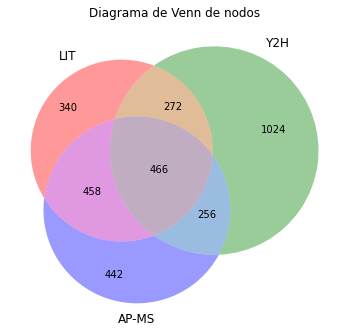

In [49]:
plt.figure(figsize = (6,6))
venn3([Red_LIT.nodes, Red_Y2H.nodes, Red_APMS.nodes], ('LIT', 'Y2H', 'AP-MS'))
plt.title('Diagrama de Venn de nodos')

Como se vió en la tabla resumen, la red Y2H es la que mayor cantidad de nodos tiene, abarcando así un gran espectro de interacciones posibles que no se encuentran en las otras redes.
En cuando a las redes LIT y AP-MS, la cantidad de nodos independientes rondan solo una tercera parte de los nodos Y2H. Por ultimo hay una gran cantidad de nodos que se presentan en los 3 metodos en simultaneo, permitiendo esto comparar interacciones entre estos 3 metodos. 

Text(0.5, 1.0, 'Diagrama de Venn de enlaces')

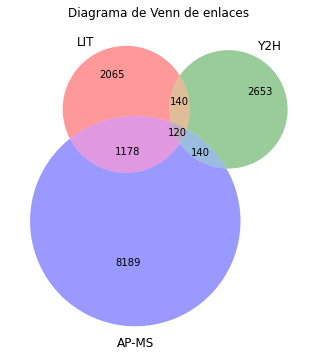

In [51]:
plt.figure(figsize = (6,6))
venn3([Red_LIT.edges, Red_Y2H.edges, Red_APMS.edges], ('LIT', 'Y2H', 'AP-MS'))
plt.title('Diagrama de Venn de enlaces')

Como era de esperarse, la red AP-MS es la que cuenta con mayor cantidad de enlaces. De este total vemos que solo $\sim 1\%$ de enlaces de cara red se presentan en las tres en simulateno.

----------------
# Ejercicio 2: Análisis de la Red Social de Delfines de Nueva Zelanda

In [7]:
Red_delfines = nx.read_gml('TC01_data/dolphins.gml')
dol_lista_de_enlaces = abrir_txt('TC01_data/dolphinsGender.txt')

### Item A: Examine diferentes opciones de layout para este grafo e identifique la que le resulte más informativa. 

In [8]:
gender = [row[1] for row in dol_lista_de_enlaces]
node_ids = list(Red_delfines.nodes)
attributes_dict = dict(zip(node_ids, gender))
nx.set_node_attributes(Red_delfines, values=attributes_dict, name='gender')

In [9]:
colores = []
for g in gender:
    if g == 'm':
        col = 'steelblue'
    elif g == 'f':
        col = 'salmon'
    else:
        col = 'lightgray'
    colores.append(col)

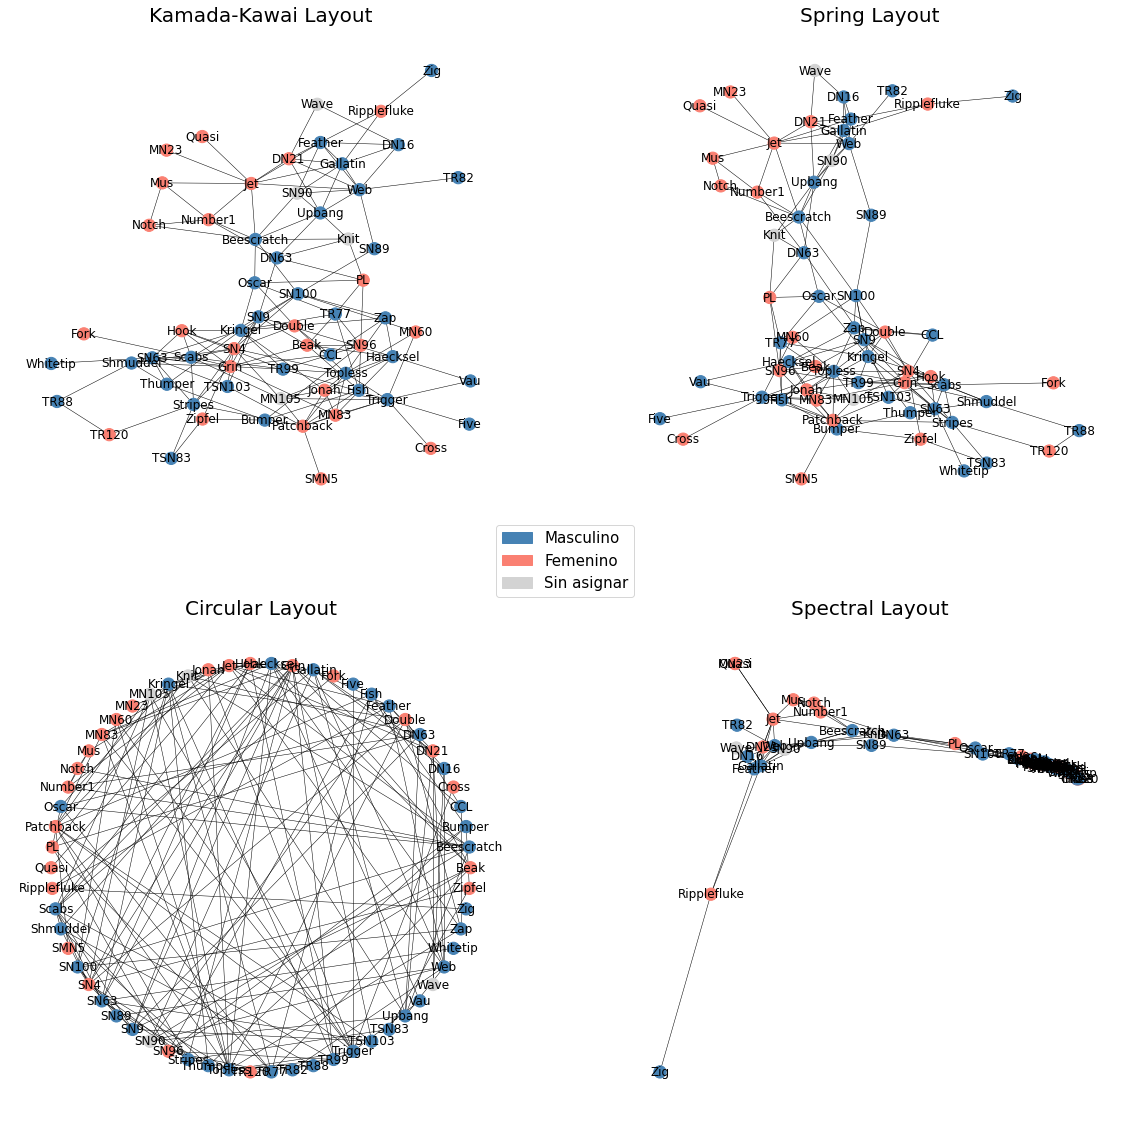

In [109]:
fig, axs = plt.subplots(2, 2, figsize=(20,20))

nx.draw_kamada_kawai(Red_delfines, with_labels=True, node_color = colores, node_size = 150, width = .5, ax = axs[0,0])
axs[0,0].set_title('Kamada-Kawai Layout', fontsize = 20)

nx.draw_spring(Red_delfines, with_labels=True, node_color = colores, node_size = 150, width = .5, ax = axs[0,1])
axs[0,1].set_title('Spring Layout', fontsize = 20)

nx.draw_circular(Red_delfines, with_labels=True, node_color = colores, node_size = 150, width = .5, ax = axs[1,0])
axs[1,0].set_title('Circular Layout', fontsize = 20)

nx.draw_spectral(Red_delfines, with_labels=True, node_color = colores, node_size = 150, width = .5, ax = axs[1,1])
axs[1,1].set_title('Spectral Layout', fontsize = 20)

masculino_label = mpatches.Patch(color='steelblue', label='Masculino')
femenino_label = mpatches.Patch(color='salmon', label='Femenino')
na_label = mpatches.Patch(color='lightgray', label='Sin asignar')

fig.legend(handles=[masculino_label, femenino_label, na_label], loc='center', fontsize=15)


De los layouts visualizados, se puede observar que tanto el "Kamada-Kawai" como el "Spring" muestran de forma mas clara la relación entre nodos. Aunque en el primero de estos se puede observar un agrupamiento mas claro entre generos iguales.

### Item B: 

In [10]:
Red_delfines = nx.read_gml('TC01_data/dolphins.gml')
dol_lista_de_enlaces = abrir_txt('TC01_data/dolphinsGender.txt')
gender = [row[1] for row in dol_lista_de_enlaces]

In [11]:
node_ids = list(Red_delfines.nodes)
attributes_dict = dict(zip(node_ids, gender))
nx.set_node_attributes(Red_delfines, values=attributes_dict, name='gender')

In [35]:
dol_lista_de_enlaces = abrir_txt('F:\Repositorios GIT\RedesComplejas\RedesComplejas\TC01_data\dolphinsGender.txt')
Red_delfines = nx.read_gml('F:\Repositorios GIT\RedesComplejas\RedesComplejas\TC01_data\dolphins.gml')

Datos = {}

for h in range(len(dol_lista_de_enlaces)): 
	A = dol_lista_de_enlaces[h][0]
	B = dol_lista_de_enlaces[h][1]
	Datos[A] = B

for nodo in Red_delfines.nodes():
	Red_delfines.nodes[nodo]['gender']=Datos[nodo]

#### i. Calcule teóricamente cuántos enlaces homofílicos esperaría dado el grado y el sexo de cada delfín.



In [36]:
enlacesTotal = []
enlacesM = []
enlacesF = []

# Calcular la fracción de enlaces que son del mismo sexo implica sumar la matriz de Adyacencia y discriminar por genero igual o no. Lo analogo es ver 
# en los vecinos a primer orden cuales de ellos son del mismo sexo y realizar este conteo para todos los nodos.

for nodo in Red_delfines.nodes(): 
    vecinoNodo = list(nx.all_neighbors(Red_delfines,nodo))

    for vec in vecinoNodo: 
        genderNodo = Red_delfines.nodes[nodo]['gender'] #Sexo del nodo
        genderVecino = Red_delfines.nodes[vec]['gender'] #Sexo del vecino
        if genderNodo == genderVecino: 
            enlacesTotal.append(1) 
            if genderNodo == 'm':
                enlacesM.append(1)
            elif genderNodo == 'f':
                enlacesF.append(1) 
            elif genderNodo == 'NA':
                enlacesTotal.append(-1) #Elimino los NA
            else:
                Warning('No se reconoce el sexo') #Si no es ni macho ni hembra ni NA, avisa que no reconoce el sexo
        else: 
            enlacesTotal.append(0)

cantidadInicialEnlaces = Red_delfines.number_of_edges() #Número de enlaces totales

homofiliaTotal = np.sum(enlacesTotal)/2
homofiliaM = np.sum(enlacesM)/2 
homofiliaF = np.sum(enlacesF)/2 

enlacesM = (cantidadInicialEnlaces-homofiliaF)
enlacesF = (cantidadInicialEnlaces-homofiliaM) 

homofiliaTeo = homofiliaTotal/cantidadInicialEnlaces
homofiliaTeo_M = homofiliaM/enlacesM
homofiliaTeo_F = homofiliaF/enlacesF

print('La fracción de enlaces con el mismo sexo:  ')
print(homofiliaTeo) 
print('\nLa fracción de enlaces entre machos (sobre los enlaces con machos):  ')
print(homofiliaTeo_M) 
print('\nLa fracciónde enlaces entre hembras (sobre los enlaces con hembras):  ')
print(homofiliaTeo_F) 

La fracción de enlaces con el mismo sexo:  
0.6037735849056604

La fracción de enlaces entre machos (sobre los enlaces con machos):  
0.4878048780487805

La fracciónde enlaces entre hembras (sobre los enlaces con hembras):  
0.36363636363636365


In [37]:
#Calcular el H_azar es recorrer la red y ver cuantos enlaces 
#Se recorre cada enlace y que sus "puntas" sean del mismo sexo, si es así suma 1, si no suma 0. 
def count_same_attribute_edges_sexo(G, sexo = 'todos'):
    attributes = nx.get_node_attributes(G, 'gender')
    same_attribute_edge_count = 0
    enlacesTotales = 0

    for u, v in G.edges():
        if attributes[u] != 'NA' and attributes[v] != 'NA':
            if (attributes[u] == sexo or attributes[v] == sexo or sexo == 'todos'):
                enlacesTotales += 1 #Cantidad de enlaces de 'sexo' con cualquier tipo

            if attributes[u] == attributes[v]:       
                    if attributes[u] == sexo or sexo == 'todos':
                        same_attribute_edge_count += 1

    if sexo == 'todos': #Como armé para cada genero agrego este if para el caso de todos
         enlacesTotales = G.number_of_edges()
    return same_attribute_edge_count, enlacesTotales

In [38]:
#Como se recorrió por enlaces, no se debe dividir por 2 ya que no paso 2 veces por el mismo par de nodos

#### Ambos Generos ####
conteo_Total, enlaceTotal_Conteo = count_same_attribute_edges_sexo(Red_delfines, 'todos')
print(f"Cantidad de nodos conectados con el mismo genero: {conteo_Total}")

homofilia_azar = conteo_Total/(enlaceTotal_Conteo) 
print('Hazar =', homofilia_azar) #Fraccion de enlaces del mismo sexo

#### Masculino ####
conteo_m, enlacesM_Conteo = count_same_attribute_edges_sexo(Red_delfines, sexo = 'm')
print(f"Cantidad de nodos conectados de genero M: {conteo_m}")

homofilia_azar_m = conteo_m/(enlacesM_Conteo)
print('Hazar_m =', homofilia_azar_m) #Fraccion de enlaces del mismo M

#### Femenino ####
conteo_f, enlacesF_Conteo  = count_same_attribute_edges_sexo(Red_delfines, sexo = 'f')
print(f"Cantidad de nodos conectados de genero F: {conteo_f}")

homofilia_azar_f = conteo_f/(enlacesF_Conteo)
print('Hazar_f =', homofilia_azar_f) #Fraccion de enlaces del mismo f

Cantidad de nodos conectados con el mismo genero: 96
Hazar = 0.6037735849056604
Cantidad de nodos conectados de genero M: 60
Hazar_m = 0.5357142857142857
Cantidad de nodos conectados de genero F: 36
Hazar_f = 0.4090909090909091


#### ii. Considere la distribución nula generada a partir de al menos 1000 asignaciones aleatorias de género.

In [39]:
contar = Counter(gender)
f = contar['f']
m = contar['m']
NA = contar['NA']

f_values = ['f'] * f
m_values = ['m'] * m
NA_values = ['NA'] * NA
genderRandom = f_values + m_values + NA_values

Homofilia Media:  0.443 
Desviacion estandar:  0.04


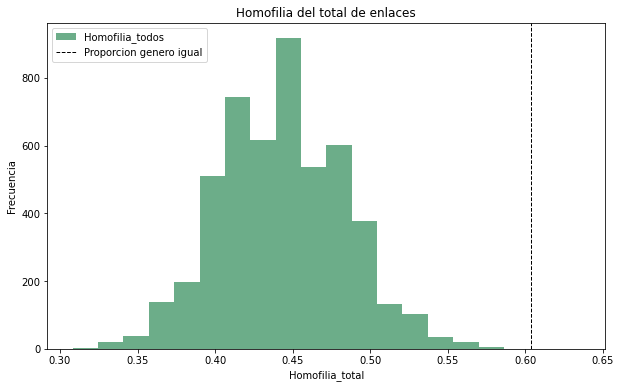

In [40]:
# Creo una copia de la red para no modificar la original
Red_copia = Red_delfines.copy()

h_azar = []
for i in range(5000): #5000 veces para tener una buena estadistica
    
    genderNR = sorted(genderRandom, key=lambda x: random.random())

    node_ids = list(Red_copia.nodes)
    attributes_dict = dict(zip(node_ids, genderNR))

    nx.set_node_attributes(Red_copia, values=attributes_dict, name='gender')    

    conteo_Total_random, enlaceTotal_random = count_same_attribute_edges_sexo(Red_copia, 'todos')

    homofilia_random = conteo_Total_random/(enlaceTotal_random)
    h_azar.append(homofilia_random)

plt.figure(figsize = (10,6))
plt.title('Homofilia del total de enlaces')
plt.hist(h_azar, bins = 20, alpha = 0.7, color = 'seagreen', label = 'Homofilia_todos');
plt.axvline(homofiliaTeo, color='k', linestyle='dashed', linewidth=1, label = 'Proporcion genero igual')

plt.xlabel('Homofilia_total')
plt.ylabel('Frecuencia')
plt.legend()

print('Homofilia Media: ', np.round(np.mean(h_azar),3), '\nDesviacion estandar: ', np.round(np.std(h_azar),3))

Homofilia Media:  0.407 
Desviacion estandar:  0.05


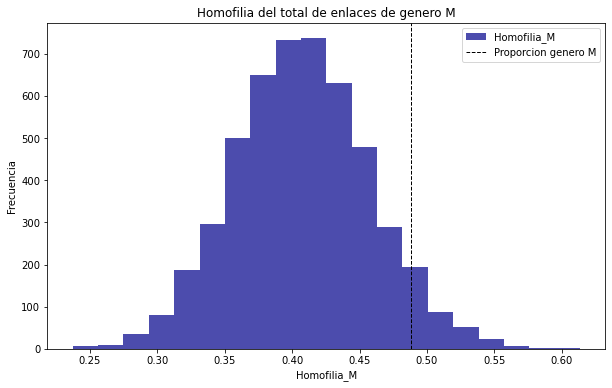

In [41]:
# Creo una copia de la red para no modificar la original
Red_copia = Red_delfines.copy()

h_azar_M = []
for i in range(5000):
    genderNR = sorted(genderRandom, key=lambda x: random.random())

    node_ids = list(Red_copia.nodes)
    attributes_dict = dict(zip(node_ids, genderNR))

    nx.set_node_attributes(Red_copia, values=attributes_dict, name='gender')    

    conteo_Total_random, enlaceTotal_random = count_same_attribute_edges_sexo(Red_copia, 'm')

    homofilia_random_M = conteo_Total_random/(enlaceTotal_random)
    h_azar_M.append(homofilia_random_M)

plt.figure(figsize = (10,6))
plt.title('Homofilia del total de enlaces de genero M')
plt.hist(h_azar_M, bins = 20, alpha = 0.7, color = 'darkblue', label = 'Homofilia_M');
plt.axvline(homofiliaTeo_M , color='k', linestyle='dashed', linewidth=1, label = 'Proporcion genero M')

plt.xlabel('Homofilia_M')
plt.ylabel('Frecuencia')
plt.legend()

print('Homofilia Media: ', np.round(np.mean(h_azar_M),3), '\nDesviacion estandar: ', np.round(np.std(h_azar_M),3))

Homofilia Media:  0.252 
Desviacion estandar:  0.048


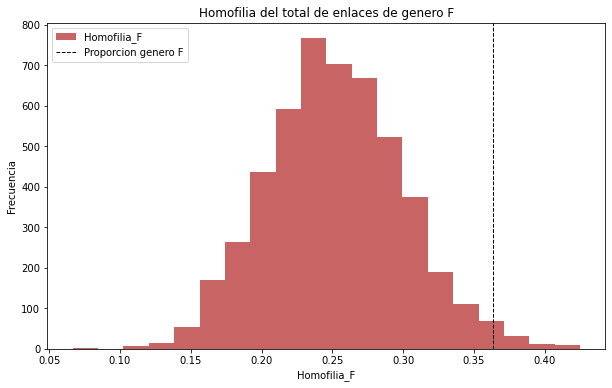

In [42]:
# Creo una copia de la red para no modificar la original
Red_copia = Red_delfines.copy()

h_azar_F = []
for i in range(5000):
    genderNR = sorted(genderRandom, key=lambda x: random.random())

    node_ids = list(Red_copia.nodes)
    attributes_dict = dict(zip(node_ids, genderNR))

    nx.set_node_attributes(Red_copia, values=attributes_dict, name='gender')    

    conteo_Total_random, enlaceTotal_random = count_same_attribute_edges_sexo(Red_copia, 'f')

    homofilia_random_F = conteo_Total_random/(enlaceTotal_random)
    h_azar_F.append(homofilia_random_F)

plt.figure(figsize = (10,6))
plt.title('Homofilia del total de enlaces de genero F')
plt.hist(h_azar_F, bins = 20, alpha = 0.7, color = 'firebrick', label = 'Homofilia_F');
plt.axvline(homofiliaTeo_F , color='k', linestyle='dashed', linewidth=1, label = 'Proporcion genero F')

plt.xlabel('Homofilia_F')
plt.ylabel('Frecuencia')
plt.legend()

print('Homofilia Media: ', np.round(np.mean(h_azar_F),3), '\nDesviacion estandar: ', np.round(np.std(h_azar_F),3))

En los 3 casos se observa que la homofilia calculada con las 5000 iteraciones tiene media alejada del valor teórico calculado (representado con lineas punteadas en cada histograma). Esto nos muestra que la red de delfines analizada es homofilica.

#### iii. Considere la distribución nula generada a partir de al menos 1000 recableos aleatorios de la red.

Homofilia Media:  0.443 
Desviacion estandar:  0.04


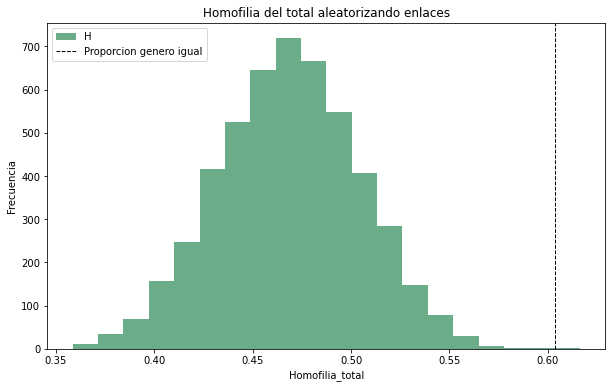

In [43]:
red_copia2 = Red_delfines.copy()
h_azar_enlaces = []

for i in range(5000):

    nx.double_edge_swap(red_copia2, nswap=red_copia2.number_of_edges()/2, max_tries=1000) #aleatorizo los enlaces
 
    conteo_Total_random, enlaceTotal_random = count_same_attribute_edges_sexo(red_copia2, 'todos')
    # print(f"Number of edges connecting nodes with the same attribute: {conteo_Total_random}")

    homofilia_random_enlaces = conteo_Total_random/(enlaceTotal_random)
    # print('Hreal =', homofilia_real_random) #Franccion de enlaces del mismo sexo
    h_azar_enlaces.append(homofilia_random_enlaces)

plt.figure(figsize = (10,6))
plt.title('Homofilia del total aleatorizando enlaces')
plt.hist(h_azar_enlaces, bins = 20, alpha = 0.7, color = 'seagreen', label = 'H');
plt.axvline(homofiliaTeo, color='k', linestyle='dashed', linewidth=1, label = 'Proporcion genero igual')

plt.xlabel('Homofilia_total')
plt.ylabel('Frecuencia')
plt.legend()

print('Homofilia Media: ', np.round(np.mean(h_azar),3), '\nDesviacion estandar: ', np.round(np.std(h_azar),3))

Homofilia Media:  0.443 
Desviacion estandar:  0.04


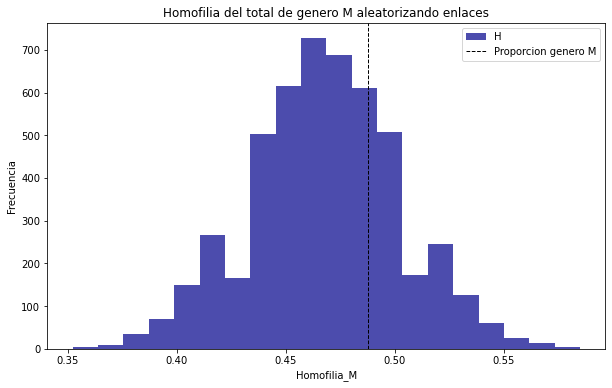

In [44]:
red_copia2 = Red_delfines.copy()
h_azar_enlaces_m = []

for i in range(5000):

    nx.double_edge_swap(red_copia2, nswap=red_copia2.number_of_edges()/2, max_tries=1000) #aleatorizo los enlaces
 
    conteo_Total_random, enlaceTotal_random = count_same_attribute_edges_sexo(red_copia2, 'todos')
    # print(f"Number of edges connecting nodes with the same attribute: {conteo_Total_random}")

    homofilia_random_enlaces = conteo_Total_random/(enlaceTotal_random)
    # print('Hreal =', homofilia_real_random) #Franccion de enlaces del mismo sexo
    h_azar_enlaces_m.append(homofilia_random_enlaces)

plt.figure(figsize = (10,6))
plt.title('Homofilia del total de genero M aleatorizando enlaces')
plt.hist(h_azar_enlaces_m, bins = 20, alpha = 0.7, color = 'darkblue', label = 'H');
plt.axvline(homofiliaTeo_M, color='k', linestyle='dashed', linewidth=1, label = 'Proporcion genero M')

plt.xlabel('Homofilia_M')
plt.ylabel('Frecuencia')
plt.legend()

print('Homofilia Media: ', np.round(np.mean(h_azar),3), '\nDesviacion estandar: ', np.round(np.std(h_azar),3))

Homofilia Media:  0.252 
Desviacion estandar:  0.048


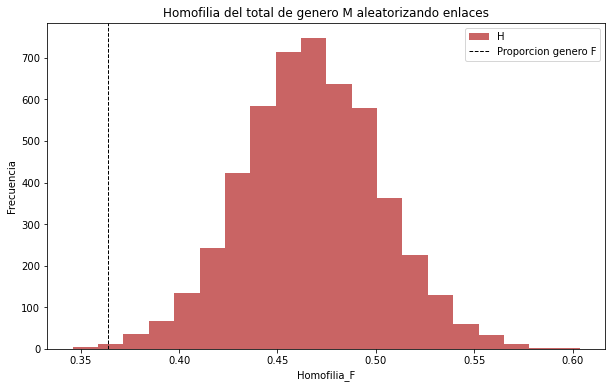

In [45]:
red_copia2 = Red_delfines.copy()
h_azar_enlaces_f = []

for i in range(5000):

    nx.double_edge_swap(red_copia2, nswap=red_copia2.number_of_edges()/2, max_tries=1000) #aleatorizo los enlaces
 
    conteo_Total_random, enlaceTotal_random = count_same_attribute_edges_sexo(red_copia2, 'todos')
    # print(f"Number of edges connecting nodes with the same attribute: {conteo_Total_random}")

    homofilia_random_enlaces = conteo_Total_random/(enlaceTotal_random)
    # print('Hreal =', homofilia_real_random) #Franccion de enlaces del mismo sexo
    h_azar_enlaces_f.append(homofilia_random_enlaces)

plt.figure(figsize = (10,6))
plt.title('Homofilia del total de genero M aleatorizando enlaces')
plt.hist(h_azar_enlaces_f, bins = 20, alpha = 0.7, color = 'firebrick', label = 'H');
plt.axvline(homofiliaTeo_F , color='k', linestyle='dashed', linewidth=1, label = 'Proporcion genero F')

plt.xlabel('Homofilia_F')
plt.ylabel('Frecuencia')
plt.legend()

print('Homofilia Media: ', np.round(np.mean(h_azar_F),3), '\nDesviacion estandar: ', np.round(np.std(h_azar_F),3))



#### iv. p-valor

In [46]:
def p_valor(homofilia, h_azar, NumBin=20):
    lins = np.linspace(min(h_azar), max(h_azar), NumBin)
    Ancho = lins[1] - lins[0]

    h, b = np.histogram(h_azar, bins=lins)  #Histograma de h_azar de las iteraciones
    h = h / sum(h) #Normalizo

    ListaPValor = []

    # Calculo la media de h_azar para saber si tomo el area de la coda izq o der
    media = np.mean(h_azar)

    if homofilia < media:
        # Calcular el p-valor sumando las áreas a la izquierda de homofilia
        for k in range(len(h)):
            if b[k] <= homofilia < b[k+1]:
                ListaPValor.append(Ancho * h[k])
            elif b[k] < homofilia:
                ListaPValor.append(Ancho * h[k])
    else:
        # Calcular el p-valor sumando las áreas a la derecha de homofilia
        for k in range(len(h)):
            if b[k] <= homofilia < b[k+1]:
                ListaPValor.append(Ancho * h[k])
            elif b[k] > homofilia:
                ListaPValor.append(Ancho * h[k])

    PValor = sum(ListaPValor)

    return PValor

In [47]:
print('**** P-valor mediante aleatorización de nodos ****')

print('P-valor para la red total: ', p_valor(homofiliaTeo, h_azar))
print('P-valor para la red de genero M: ', p_valor(homofiliaTeo_M, h_azar_M))
print('P-valor para la red de genero F: ', p_valor(homofiliaTeo_F, h_azar_F))

print('\n**** P-valor mediante aleatorización de enlaces ****')
print('P-valor para la red total: ', p_valor(homofiliaTeo, h_azar_enlaces))
print('P-valor para la red de genero M: ', p_valor(homofiliaTeo_M, h_azar_enlaces_m))
print('P-valor para la red de genero F: ', p_valor(homofiliaTeo_F, h_azar_enlaces_f))




**** P-valor mediante aleatorización de nodos ****
P-valor para la red total:  3.44256868586561e-06
P-valor para la red de genero M:  0.0017667795930092073
P-valor para la red de genero F:  0.0005315137401024685

**** P-valor mediante aleatorización de enlaces ****
P-valor para la red total:  2.7143330023171152e-06
P-valor para la red de genero M:  0.003551804038397885
P-valor para la red de genero F:  4.071499503475673e-05


Dado los valores bajos del p-valor podemos decir para la comunidad total de delfines, así como para cada genero, que la fracción de enlaces del mismo genero es poco probable que se deba al azar. Por lo tanto podemos decir que la red es homofilica.